In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://securit

In [2]:
# Spark for Python
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 47 kB/s 
     |████████████████████████████████| 199 kB 50.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=15474951e6a8ed2d7274285c7f89c76b44c294ca0546271d541fc3805a9e7ea3
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [3]:
pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# create a spark dataframe with 3 numeric columns and one categorical (colour)
import random
from pyspark.sql import SparkSession,SQLContext
#spark = SparkSession.builder.appName("Basics").getOrCreate()
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)


A = [random.normalvariate(0,1) for i in range(100)]
B = [random.normalvariate(1,2) for i in range(100)]
C = [random.normalvariate(-1,0.5) for i in range(100)]
col = [random.choice(['#e41a1c', '#377eb8','#4eae4b']) for i in range(100)]

df = sqlContext.createDataFrame(zip(A,B,C,col), ["A","B","C","col"])


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [5]:
df.show()

+-------------------+--------------------+--------------------+-------+
|                  A|                   B|                   C|    col|
+-------------------+--------------------+--------------------+-------+
| 1.1926297393341798|0.014840153736612294|    -0.8194884530797|#377eb8|
|  1.404747406214317| -1.0011848747879157| -1.1779518421337913|#e41a1c|
|-1.3743754221472042|  1.8852227883652408| -1.1754639512530862|#377eb8|
| 0.3988031897266786| -0.1892613643655121| -1.0835850159724576|#4eae4b|
|-0.5058811813732662| -1.8336896999967487|  -1.302017516395123|#e41a1c|
|  0.642515502978067|    1.75109464495413|  -1.135414177914809|#4eae4b|
| -2.338338362482733|  1.9226415983921237|  -0.608440917592584|#377eb8|
|-0.8836736303505285| -0.6803317888182685|-0.13697727008817584|#e41a1c|
|0.13220488696199997|  -1.801619620846556| -0.8086298796222022|#377eb8|
| 0.7884394979825794|  1.3476744115170203| -0.8310645093203954|#4eae4b|
|0.10558059122501569|  0.4272541702610484| -1.2210439898063434|#

In [6]:
# convert to pandas and plot
pdf = df.toPandas()


In [7]:
pdf.head()

,A,B,C,col
0,1.192630,0.014840,-0.819488,#377eb8
1,1.404747,-1.001185,-1.177952,#e41a1c
2,-1.374375,1.885223,-1.175464,#377eb8
3,0.398803,-0.189261,-1.083585,#4eae4b
4,-0.505881,-1.833690,-1.302018,#e41a1c


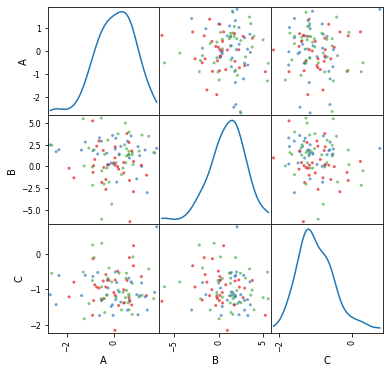

In [8]:
import pandas as pd


stuff = pd.plotting.scatter_matrix(pdf, alpha=0.7, figsize=(6, 6), diagonal='kde', color=pdf.col)

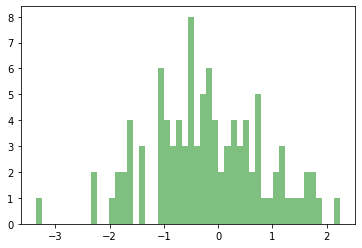

In [11]:
import random
import matplotlib.pyplot as plt

# create an RDD of 100 random numbers
x = [random.normalvariate(0,1) for i in range(100)]
rdd = sc.parallelize(x)

# plot data in RDD - use .collect() to bring data to local
num_bins = 50
n, bins, patches = plt.hist(rdd.collect(), num_bins, facecolor='green', alpha=0.5)